## Carregando os dados

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

orders = pd.read_csv('baseNY/food_order.csv')

orders.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


## Pré-processamento: eliminação de atributos irrelevantes

In [201]:
orders = orders.drop(columns=['order_id','customer_id', 'restaurant_name','cuisine_type'])

In [202]:
#Substituir valores String por Inteiros [Weekday: 1, Weekend: 0] 
# orders.loc[orders['day_of_the_week'] == 'Weekend', 'day_of_the_week'] = 0
# orders.loc[orders['day_of_the_week'] == 'Weekday', 'orders'] = 1
orders.loc[orders['rating'] == 'Not given', 'rating'] = np.nan

orders = orders
           

## Pré-processamento: tratamento de atributos com valores ausentes

In [203]:
# índices das linhas que contém valores NaN
idxRowNan = pd.isnull(orders).any().to_numpy().nonzero()

# imprime apenas as linhas com valoes ausentes
display(orders.iloc[idxRowNan].head(n=10))

,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,12.23,Weekday,5,23,28


In [204]:
def trataFaltantes(orders):
    '''
    Substitui os valores faltantes pela média dos outros valores do mesmo atributo
    de amostras que sejam da mesma classe    
    '''
    # print(orders['rating'])
    # # seleciona apenas as linhas da base de dados onde a coluna largura_sepala não contém valores nulos
    # notNull_rating = orders.loc[~pd.isnull(orders['rating']), :]
    
    print(orders['rating'])
    # calcula a media dos valores do atributo rating que não são nulos
    media_rating = orders['rating'].dropna().astype(int).mean()

    print(media_rating)
   
    # substitui os valores nulos pela média 
    orders.loc[ pd.isnull(orders['rating']), 'rating'] = round(media_rating)

    return orders

    


In [205]:
# imprime apenas as linhas que antes possuiam valores NaN
trataFaltantes(orders)
print('\nAmostras que possuiam valores faltantes:')
display(orders.iloc[idxRowNan])

orders.head(n=10)

0       NaN
1       NaN
2         5
3         3
4         4
       ... 
1893      5
1894      5
1895    NaN
1896      5
1897    NaN
Name: rating, Length: 1898, dtype: object
4.344234079173838

Amostras que possuiam valores faltantes:


,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,12.23,Weekday,5,23,28


,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,30.75,Weekend,4,25,20
1,12.08,Weekend,4,25,23
2,12.23,Weekday,5,23,28
3,29.20,Weekend,3,25,15
4,11.59,Weekday,4,25,24
5,25.22,Weekday,3,20,24
6,6.07,Weekend,4,28,21
7,5.97,Weekday,3,33,30
8,16.44,Weekday,5,21,26
9,7.18,Weekday,5,29,26


## Pré-processamento: tratamento de dados inconsistentes ou redundantes

In [206]:
#Pré-processamento: tratamento de dados inconsistentes ou redundantes
#Remove dados duplicados, que para fim estátisticos são irrelevantes
orders_duplicates = orders [ orders.duplicated(subset=['cost_of_the_order', 'day_of_the_week', 'rating', 'food_preparation_time', 'delivery_time'], keep=False)]

if len(orders_duplicates) > 0:
  print('\nAmostras redudantes ou inconsistentes:\n')
  print(orders_duplicates)
else: print('\nNão existem amostras redudantes ou inconsistentes')


Amostras redudantes ou inconsistentes:

      cost_of_the_order day_of_the_week rating  food_preparation_time  \
158               14.07         Weekend      4                     26   
281               12.18         Weekend      4                     22   
283               12.13         Weekend      4                     32   
364               19.40         Weekend      4                     28   
396               12.18         Weekday      5                     23   
465               14.07         Weekend      4                     26   
545               12.23         Weekend      4                     21   
656               19.45         Weekday      4                     28   
785               12.23         Weekend      4                     21   
918               12.18         Weekend      4                     22   
929               12.13         Weekend      4                     32   
978               12.13         Weekend      4                     25   
1028      

In [207]:
orders = orders[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating' ,'day_of_the_week']]
orders.head(n=10)

,cost_of_the_order,food_preparation_time,delivery_time,rating,day_of_the_week
0,30.75,25,20,4,Weekend
1,12.08,25,23,4,Weekend
2,12.23,23,28,5,Weekday
3,29.20,25,15,3,Weekend
4,11.59,25,24,4,Weekday
5,25.22,20,24,3,Weekday
6,6.07,28,21,4,Weekend
7,5.97,33,30,3,Weekday
8,16.44,21,26,5,Weekday
9,7.18,29,26,5,Weekday


In [208]:

orders_detalhes = orders.describe()


print('\nDetalhes:\n')
print(orders_detalhes)


Detalhes:

       cost_of_the_order  food_preparation_time  delivery_time
count        1898.000000            1898.000000    1898.000000
mean           16.498851              27.371970      24.161749
std             7.483812               4.632481       4.972637
min             4.470000              20.000000      15.000000
25%            12.080000              23.000000      20.000000
50%            14.140000              27.000000      25.000000
75%            22.297500              31.000000      28.000000
max            35.410000              35.000000      33.000000


## Pré-processamento: normalização dos atributos

In [209]:
def normalizar(X):
   """
   Normaliza os atributos em X
  
   Esta função retorna uma versao normalizada de X onde o valor da
   média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
   um importante passo de pré-processamento quando trabalha-se com
   métodos de aprendizado de máquina.
   """
  
   m, n = X.shape # m = qtde de objetos e n = qtde de atributos por objeto
  
   # Incializa as variaves de saída
   X_norm = np.random.rand(m,n) # inicializa X_norm com valores aleatórios
   mu = 0 # inicializa a média
   sigma = 1 # inicializa o desvio padrão
   
   mu = np.mean(X, axis=0)
   sigma = np.std(X, axis=0, ddof=1)
  
   for i in range(m):
       X_norm[i,:] = (X[i,:]-mu) / sigma
      
  
   return X_norm, mu, sigma

In [210]:
# coloca os valores dos atributos na variável X
X = orders.iloc[:,0:-1].values.astype(int)
print(X)
 
# chama a função para normalizar X
X_norm, mu, sigma = normalizar(X)
 
orders.iloc[:,0:-1] = X_norm
 
print('\nPrimeira amostra da base antes da normalização: [%2.4f %2.4f].' %(X[0,0],X[0,1]))
print('\nApós a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].')
print('\nPrimeira amostra da base após normalização: [%2.4f %2.4f].' %(X_norm[0,0],X_norm[0,1]))

[[30 25 20  4]
 [12 25 23  4]
 [12 23 28  5]
 ...
 [25 31 24  4]
 [12 23 31  5]
 [19 28 24  4]]

Primeira amostra da base antes da normalização: [30.0000 25.0000].

Após a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].

Primeira amostra da base após normalização: [1.8439 -0.5120].


In [211]:
# apresenta as principais estatísticas da base de dados
orders_detalhes = orders.describe()
 
display(orders_detalhes.round(8))

,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000
mean,0.000000,-0.000000,-0.000000
std,1.000000,1.000000,1.000000
min,-1.607108,-1.591366,-1.842433
25%,-0.545260,-0.943764,-0.836930
50%,-0.279798,-0.080296,0.168573
75%,0.782050,0.783172,0.771874
max,2.507554,1.646640,1.777377


## Pré-processamento: detecção de *outliers*

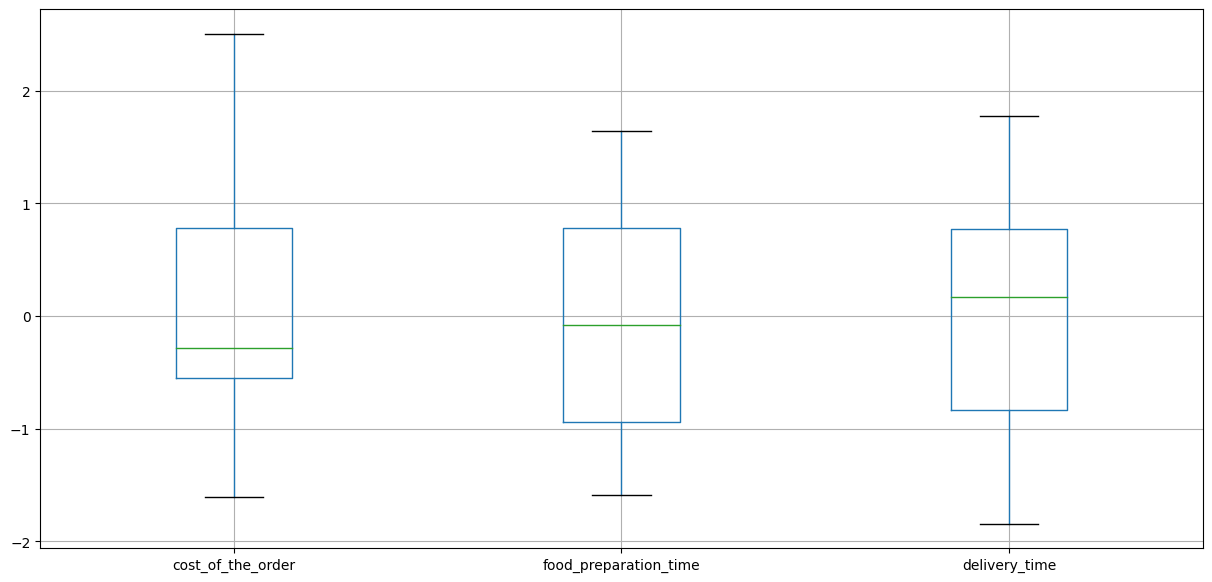

In [212]:
# gera um bloxplot para cada atributo
orders.boxplot(figsize=(15,7))
plt.show()


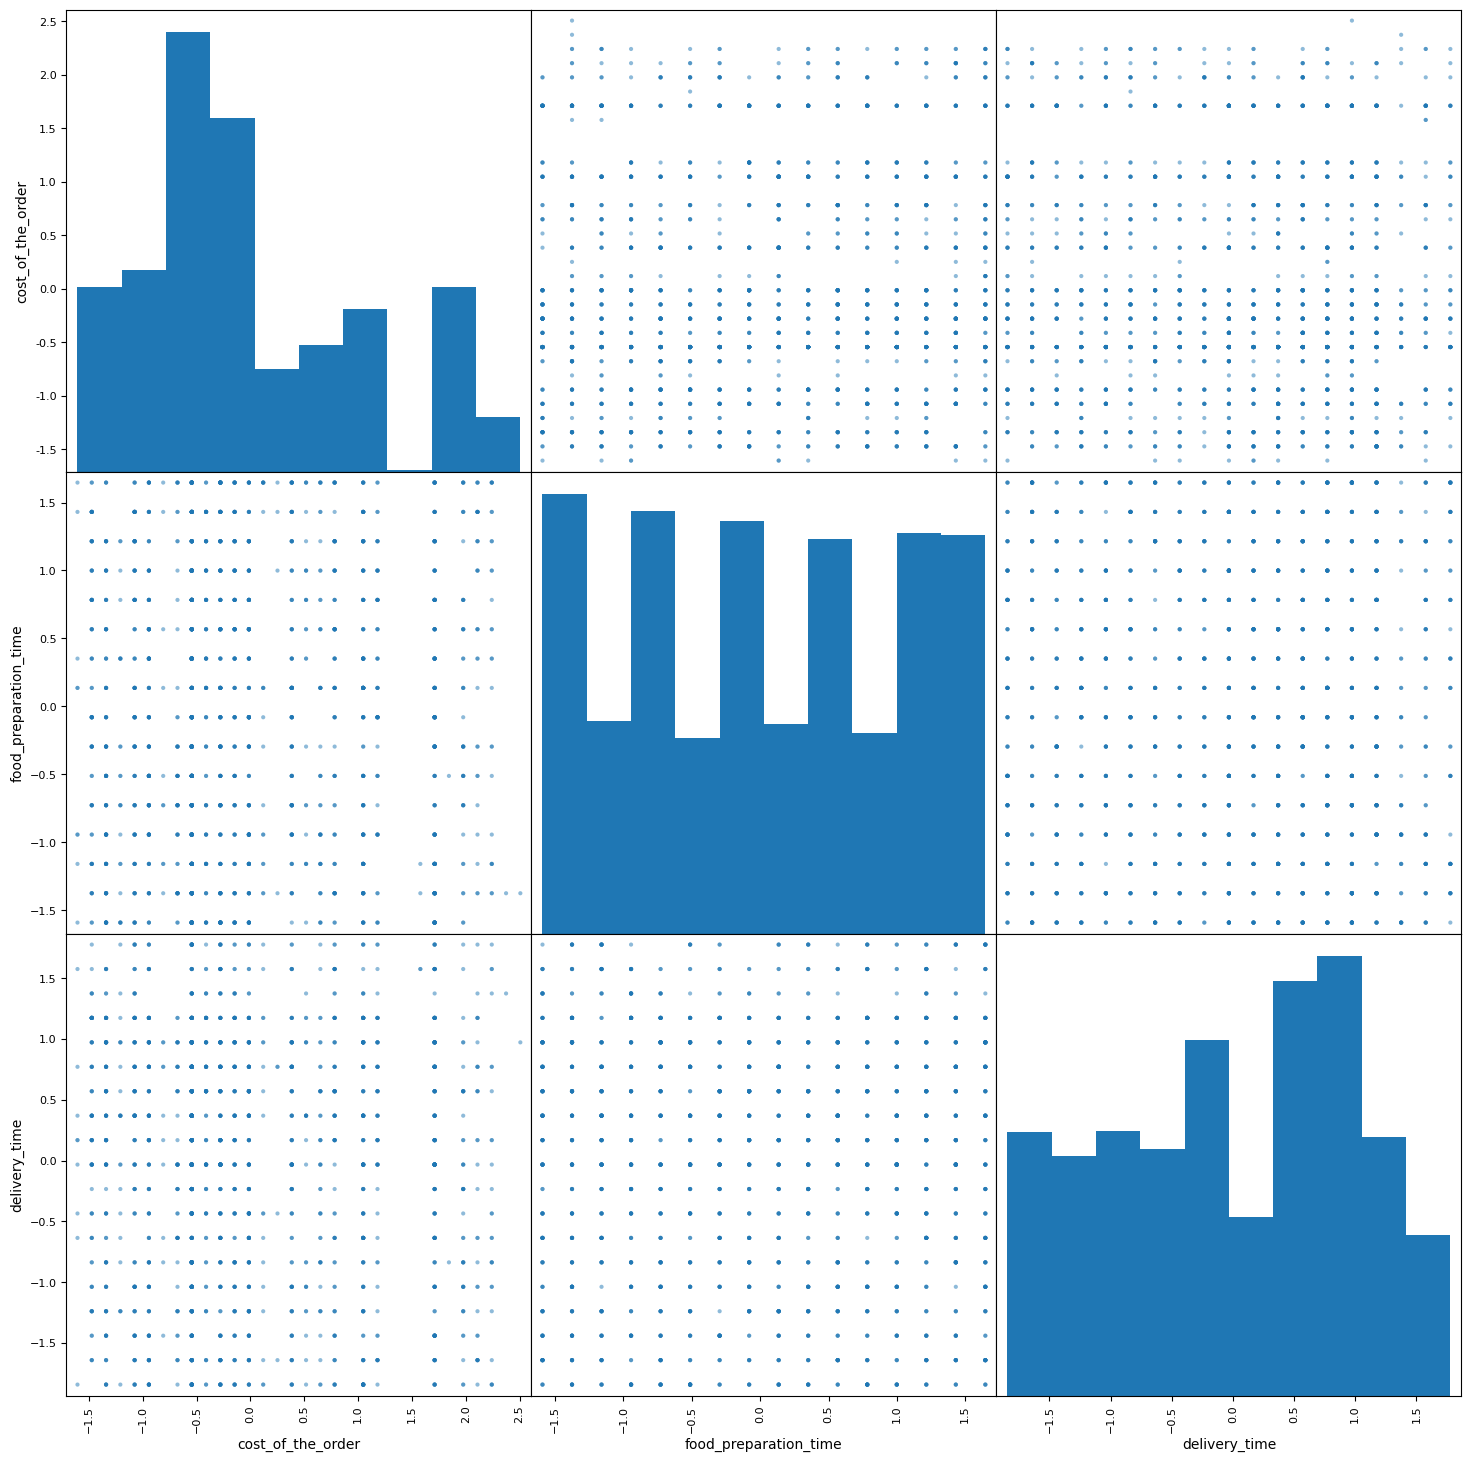

In [213]:
pd.plotting.scatter_matrix(orders, figsize=(18,18))
plt.show()

/home/viniciuspolo/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


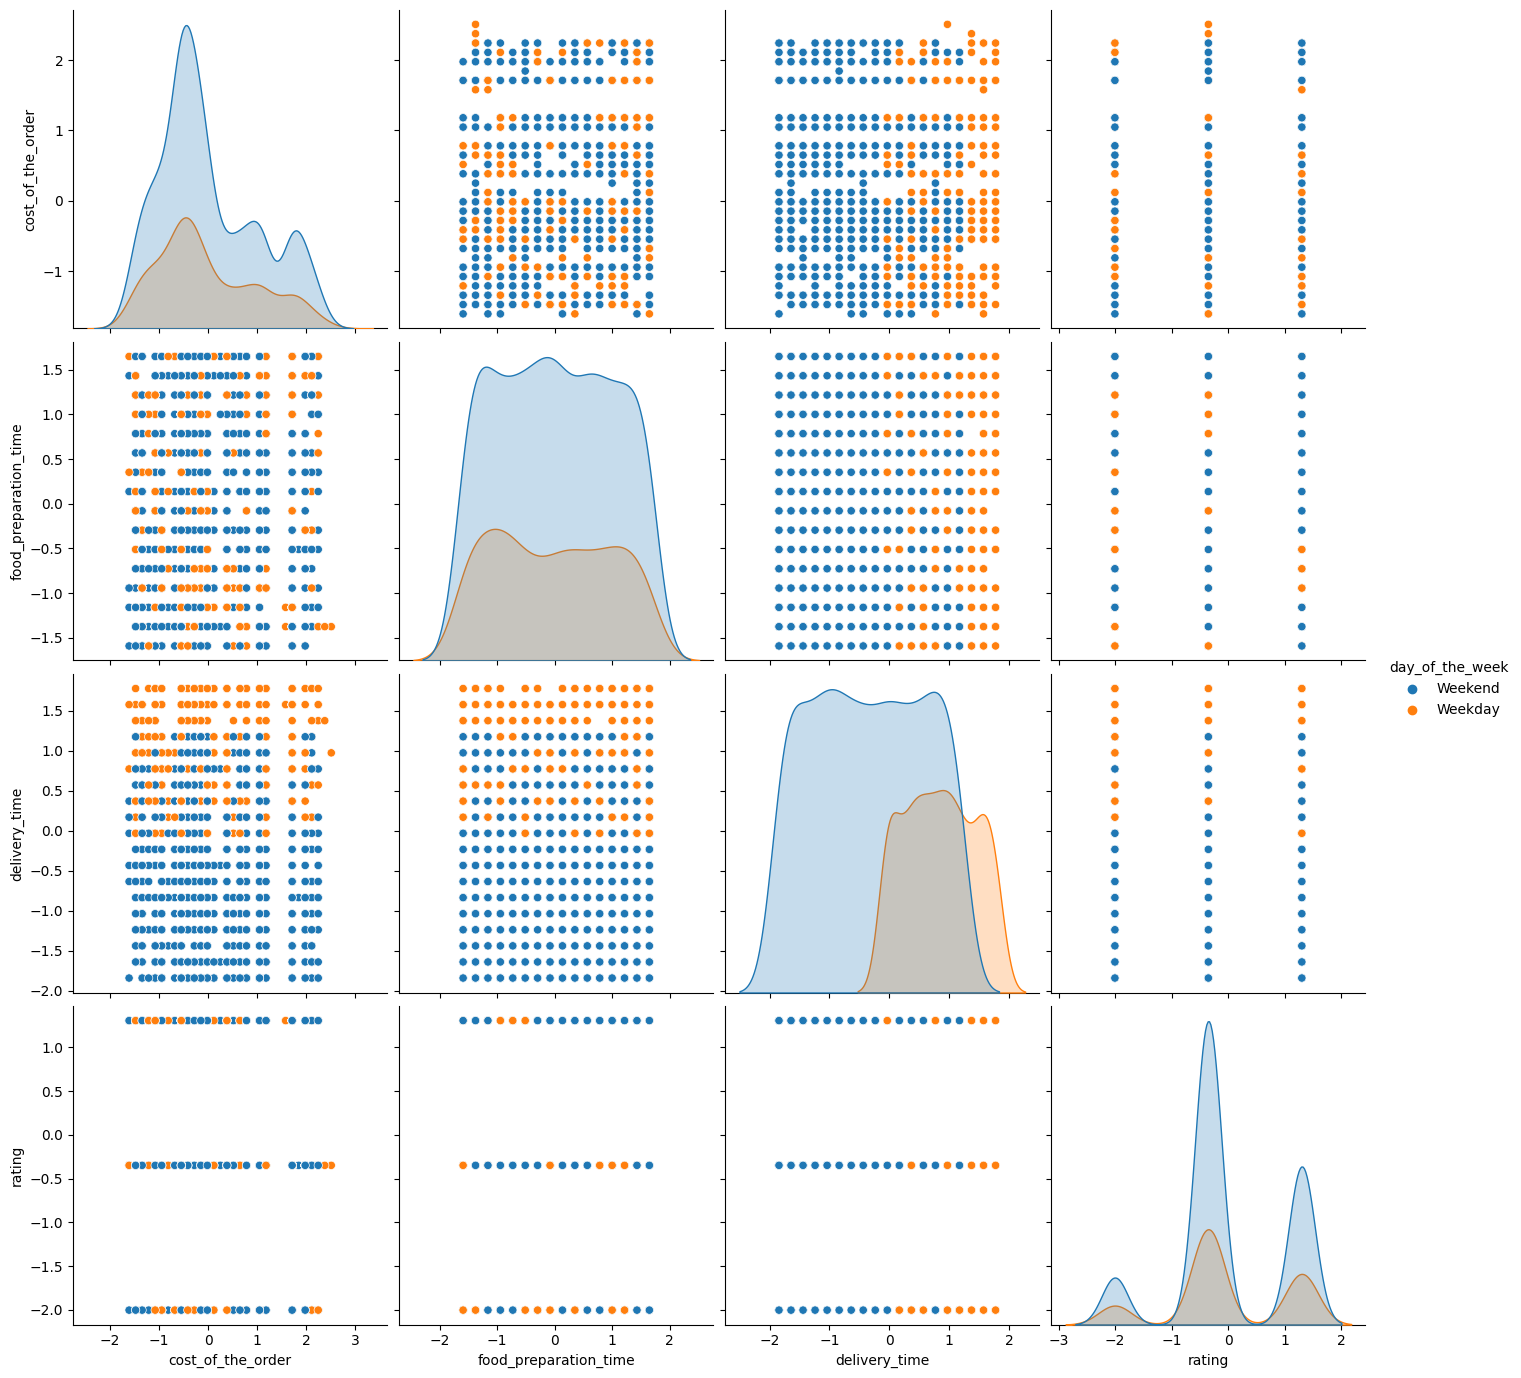

In [214]:
# matriz de gráficos scatter
sns.pairplot(orders, hue='day_of_the_week', height=3.5);
 
# mostra o gráfico usando a função show() da matplotlib
plt.show()


/home/viniciuspolo/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


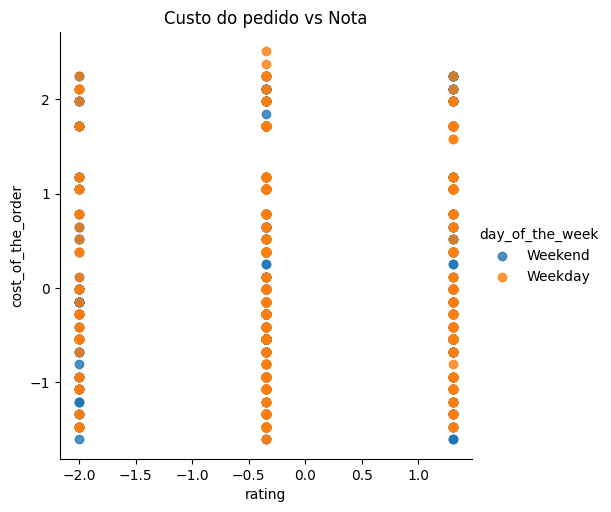

In [215]:
# define o scatter plot
sns.lmplot(x='rating', y='cost_of_the_order', data=orders,
          fit_reg=False,
          hue='day_of_the_week')
 
# cria um título para o gráfico
plt.title('Custo do pedido vs Nota')
 
# mostra o gráfico
plt.show()

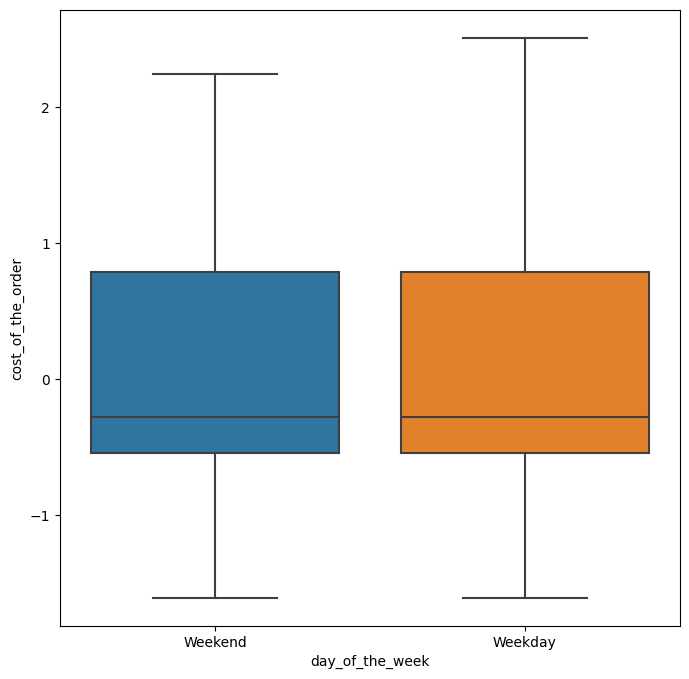

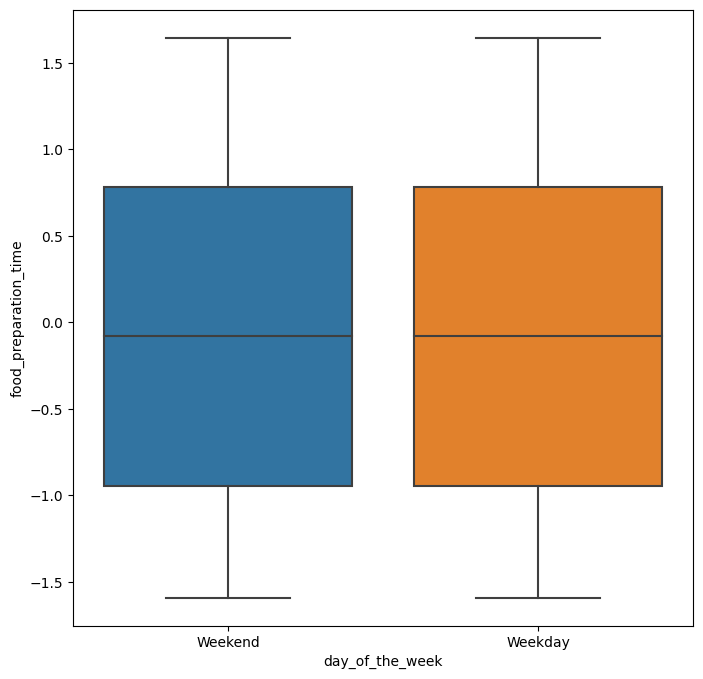

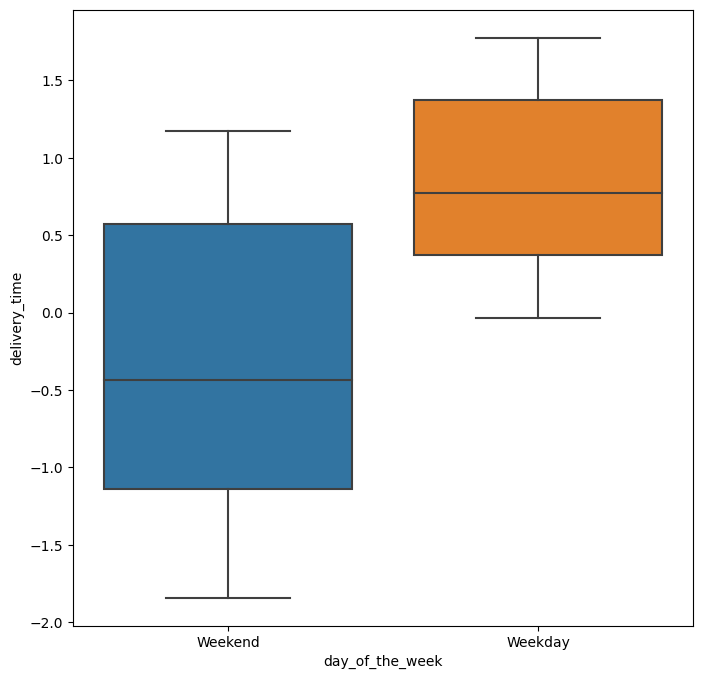

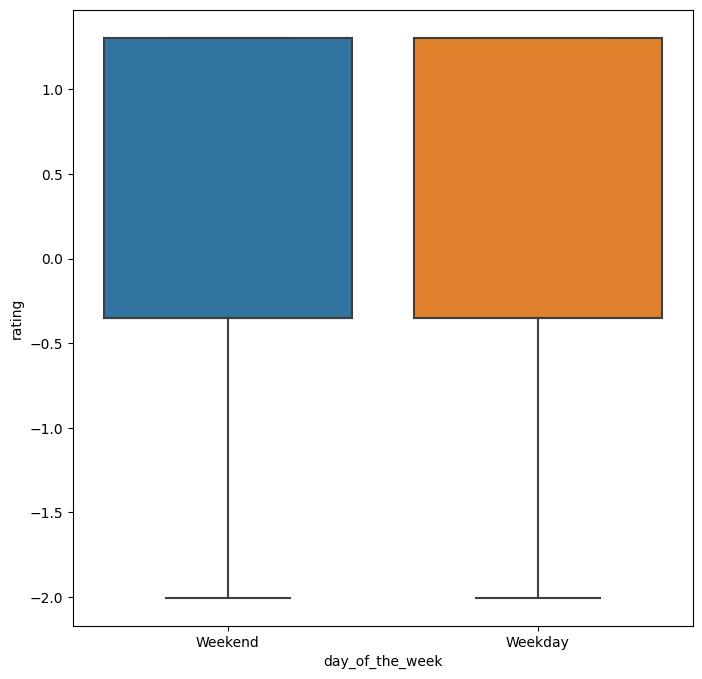

In [216]:
for atributo in orders.columns[:-1]:
   # define a dimensão do gráfico
   plt.figure(figsize=(8,8))
 
   # cria o boxplot
   sns.boxplot(x="day_of_the_week", y=atributo, data=orders, whis=1.5)
 
   # mostra o gráfico
   plt.show()

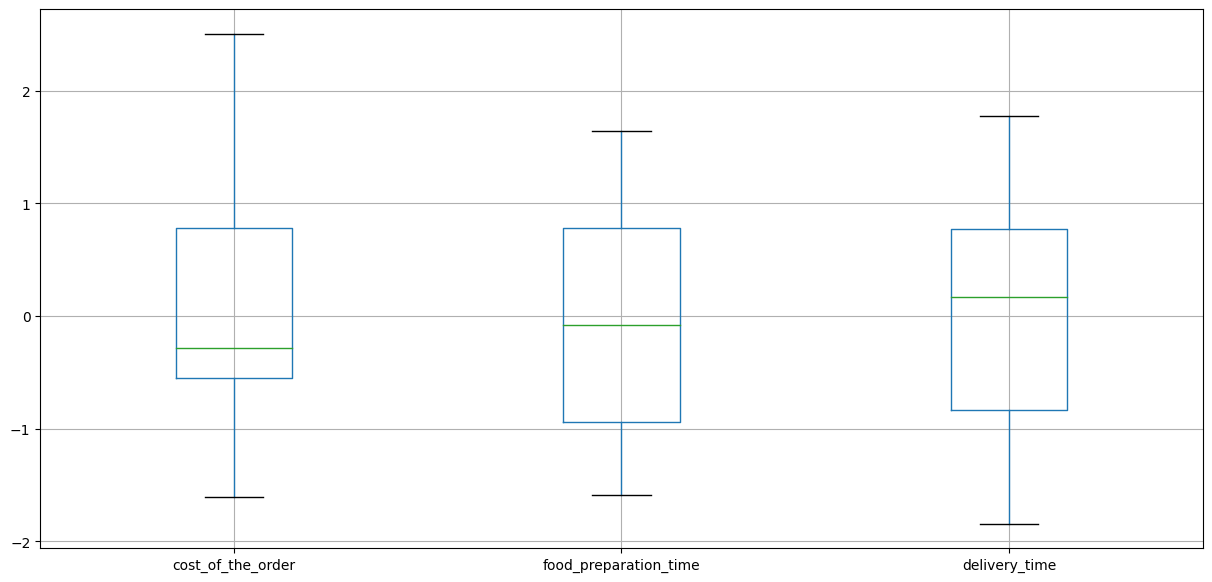

/home/viniciuspolo/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


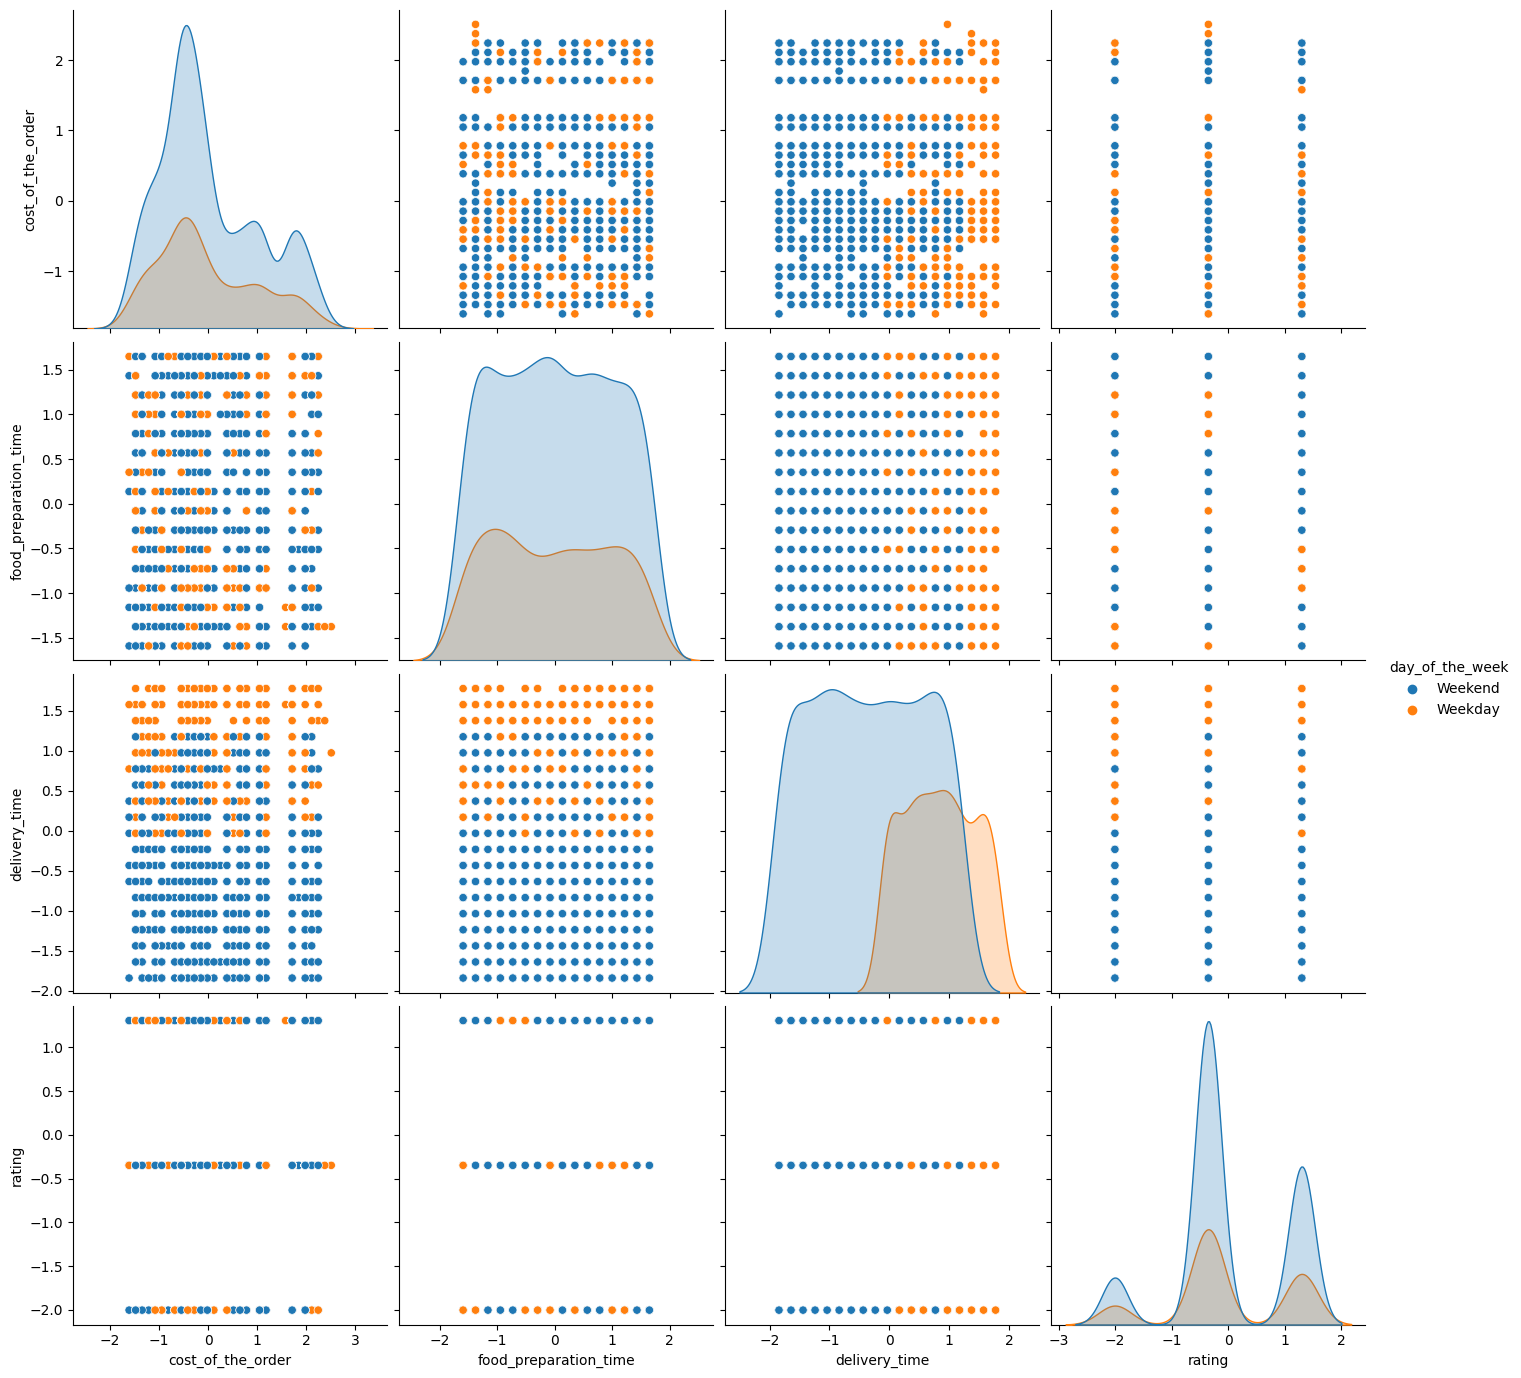

In [217]:
def removeOutliers(orders):
   """
   Remove os outliers da base de dados
   """
  
   for atributo in orders.columns[:-1]:
 
       # obtem o terceiro e o primeiro quartil.
       q75, q25 = np.percentile(orders[atributo].values, [75 ,25])
      
       # calcula o IQR
       IQR = q75 - q25
 
       # remove os outliers com base no valor do IQR
       orders = orders[ (orders[atributo]<=(q75+1.5*IQR)) & (orders[atributo]>=(q25-1.5*IQR)) ]
  
   return orders
 
# remove os outliers
orders = removeOutliers(orders)
 
# apresenta as principais estatísticas sobre a base de dados
orders.boxplot(figsize=(15,7))
plt.show()
 
# matriz de gráficos scatter
sns.pairplot(orders, hue='day_of_the_week', height=3.5);
 
# mostra o gráfico usando a função show() da matplotlib
plt.show()

## Pré-processamento: distribuição das classes

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

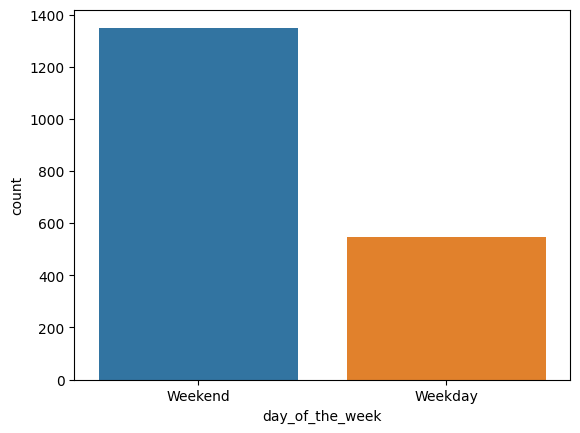

In [218]:
display(orders['day_of_the_week'].value_counts())

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="day_of_the_week", data=orders)

# mostra o gráfico
plt.show()

## Pré-processamento: correlação entre os atributos

In [219]:
# criando uma matriz X com os valores do data frame
#arrendonda para Int para Funcionar
X = orders.iloc[:,:-1].round().astype(int).values
print(X)
# matriz de correlação
correlation = np.corrcoef(X, rowvar=False)

print('\n\nMatriz de correlação: ')
display(correlation)

[[ 2 -1 -1  0]
 [-1 -1  0  0]
 [-1 -1  1  1]
 ...
 [ 1  1  0  0]
 [-1 -1  1  1]
 [ 0  0  0  0]]


Matriz de correlação: 


array([[ 1.        ,  0.05577897, -0.01310433,  0.0275699 ],
       [ 0.05577897,  1.        ,  0.01443105, -0.00389454],
       [-0.01310433,  0.01443105,  1.        , -0.00626766],
       [ 0.0275699 , -0.00389454, -0.00626766,  1.        ]])

In [220]:
# matriz de correlação

#Substituir valores String por Inteiros [Weekday: 1, Weekend: 0] 
orders.loc[orders['day_of_the_week'] == 'Weekend', 'day_of_the_week'] = 0
orders.loc[orders['day_of_the_week'] == 'Weekday', 'day_of_the_week'] = 1


orders_correlation = orders.corr()

print('\n\nMatriz de correlação: ')
display(orders_correlation)



Matriz de correlação: 


,cost_of_the_order,food_preparation_time,delivery_time,rating,day_of_the_week
cost_of_the_order,1.000000,0.040218,-0.030325,0.038910,-0.014839
food_preparation_time,0.040218,1.000000,0.011094,-0.003918,-0.021970
delivery_time,-0.030325,0.011094,1.000000,-0.007847,0.534801
rating,0.038910,-0.003918,-0.007847,1.000000,-0.019807
day_of_the_week,-0.014839,-0.021970,0.534801,-0.019807,1.000000


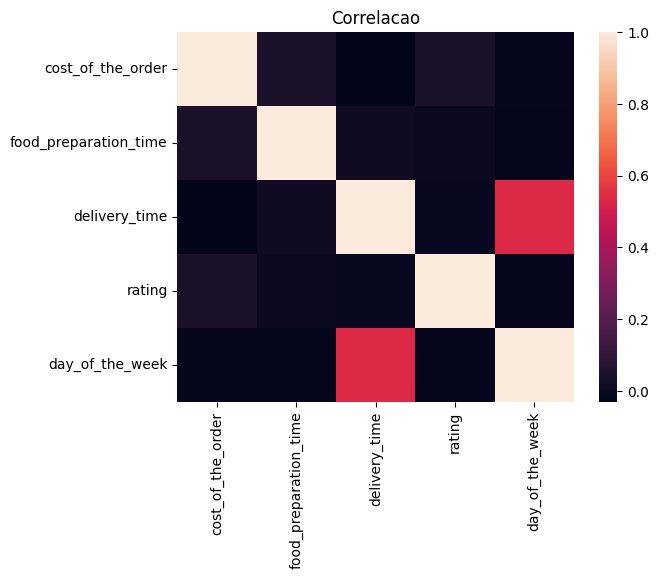

In [221]:
# cria um mapa de cores dos valores da correlação
sns.heatmap(orders_correlation, 
        xticklabels=orders_correlation.columns,
        yticklabels=orders_correlation.columns)

plt.title('Correlacao')
plt.show()